# Allstate Claims Severity

Kaggle challenge

# 1)- Importing key libraries


In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# for modeling

from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pandas import concat
from numpy import concatenate

# evaluation matrices
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# For Quant. of interest
from math import sqrt
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

In [6]:
#For Deep learning

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


In [7]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib,scipy,sklearn

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
pandas 0.23.4
numpy 1.16.2
seaborn 0.9.0
matplotlib 2.1.0
scipy 1.1.0
sklearn 0.20.3
Wed Aug 28 17:05:06 2019 W. Europe Daylight Time

# 2)- Loading data

In [8]:
df_insurance=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submit=pd.read_csv('sample_submission.csv')

In [9]:
df_insurance.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [10]:
df_insurance.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [11]:
df_insurance.shape

(188318, 132)

In [12]:
df_insurance.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [13]:
df_test.shape

(125546, 131)

In [14]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In test set, we do not have our dependant feature i.e loss

### 2a)- Feature Description

In [15]:
df_insurance.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


### 2b)drop id feature

In [16]:
df_insurance.drop('id',axis=1, inplace=True)

In [17]:
df_insurance.shape

(188318, 131)

### 2c)- Data type

In [18]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df_insurance)
table_dtype

,Data Type
loss,float64
cont1,float64
cont2,float64
cont3,float64
cont4,float64
cont5,float64
cont6,float64
cont14,float64
cont8,float64
cont9,float64


### 2d)-Skewness of the distribution

In [19]:
print(df_insurance.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


# 3)- Model preparing

In [20]:
# using already saved data

df_insurance=pd.read_pickle('train.pkl')
df_insurance.shape

(188318, 132)

In [21]:
df_insurance.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [22]:
#drop id variable from current data
df_insurance.drop('id',axis=1, inplace=True)
df_insurance.shape

(188318, 131)

### 3.1)- splitting x and y variables

In [23]:
Y = df_insurance['loss'].values
X = df_insurance.drop('loss', axis=1).values
print(Y.shape)
print(X.shape)

(188318,)
(188318, 130)


In [24]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 3.2)-normalize features

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)

### 3.3)-Split the data into train-test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2019)

In [27]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 130)
(37664, 130)
(150654,)
(37664,)


# 4)- Dense Nueral Network

In [29]:
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU
model_dense = Sequential()
# as first layer in a sequential model:
#Initializations define the way to set the initial random weights of Keras layers
model_dense.add(Dense(400, input_dim = X_train.shape[1], init = 'he_normal')) 
#he_normal initialization works better for layers with ReLu activation.
model_dense.add(PReLU()) # Parametric Rectified Linear Unit (PReLU)
model_dense.add(Dropout(0.4))
# after the first layer, you don't need to specify the size of the input anymore:
model_dense.add(Dense(200, init = 'he_normal'))
model_dense.add(PReLU())
model_dense.add(Dropout(0.2))
model_dense.add(Dense(1, init = 'he_normal'))
model_dense.compile(loss = 'mse', optimizer = 'adadelta')# Adadelta is an extension of Adagrad

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               52400     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 400)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 200)               200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total para

In [31]:
history = model_dense.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 18s - loss: 4997501.5275 - val_loss: 4510088.2453
Epoch 2/15
 - 17s - loss: 4457779.8321 - val_loss: 4371791.5443
Epoch 3/15
 - 18s - loss: 4367022.6333 - val_loss: 4329667.9538
Epoch 4/15
 - 18s - loss: 4307955.4116 - val_loss: 4289142.7605
Epoch 5/15
 - 18s - loss: 4286550.5908 - val_loss: 4269801.0213
Epoch 6/15
 - 18s - loss: 4275180.8155 - val_loss: 4281431.2510
Epoch 7/15
 - 18s - loss: 4250897.4141 - val_loss: 4249937.1103
Epoch 8/15
 - 18s - loss: 4240698.9403 - val_loss: 4250144.8291
Epoch 9/15
 - 18s - loss: 4236162.5410 - val_loss: 4281452.6262
Epoch 10/15
 - 18s - loss: 4228430.8056 - val_loss: 4294931.4763
Epoch 11/15
 - 17s - loss: 4212152.4664 - val_loss: 4244792.8916
Epoch 12/15
 - 17s - loss: 4230656.7468 - val_loss: 4261192.6696
Epoch 13/15
 - 17s - loss: 4215388.9798 - val_loss: 4268405.5409
Epoch 14/15
 - 18s - loss: 4207143.7743 - val_loss: 4385944.2787


In [32]:
y_pred_dense = model_dense.predict(X_test,verbose=1)

37664/37664 [==============================] - 1s 15us/step


In [ ]:
#history.history['val_loss']

In [33]:
mse_dense = mean_squared_error(y_test, y_pred_dense)
mae_dense = mean_absolute_error(y_test, y_pred_dense)
rmse_dense = mean_squared_error(y_test, y_pred_dense)**0.5
r2_dense = r2_score(y_test, y_pred_dense)

In [34]:
print('MSE    : %0.4f ' % mse_dense)
print('MAE    : %0.4f ' % mae_dense)
print('RMSE   : %0.4f ' % rmse_dense)
print('R2     : %0.4f ' % r2_dense)

MSE    : 4256882.8314 
MAE    : 1224.1169 
RMSE   : 2063.2215 
R2     : 0.5049 


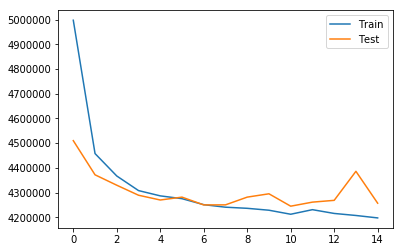

In [35]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

# 5)- Buidling LSTM Model

### 5a)-Reshaping input for lstm model

In [36]:
print(X_train.shape)
print(X_test.shape)

(150654, 130)
(37664, 130)


In [37]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 1, 130)
(37664, 1, 130)
(150654,)
(37664,)


In [39]:
X_train.shape[1]

1

In [40]:
X_train.shape[2]

130

In [41]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                36200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 36,251
Trainable params: 36,251
Non-trainable params: 0
_________________________________________________________________


### 5b)-Fit model

In [43]:
history = model.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 150654 samples, validate on 37664 samples
Epoch 1/15
 - 15s - loss: 16238528.5174 - val_loss: 15205093.0407
Epoch 2/15
 - 15s - loss: 13863110.3375 - val_loss: 13064725.1444
Epoch 3/15
 - 15s - loss: 11964680.2295 - val_loss: 11396482.8803
Epoch 4/15
 - 16s - loss: 10530747.3868 - val_loss: 10183555.0780
Epoch 5/15
 - 15s - loss: 9535877.6301 - val_loss: 9389736.3304
Epoch 6/15
 - 15s - loss: 8926990.2037 - val_loss: 8942852.7960
Epoch 7/15
 - 15s - loss: 8545717.7317 - val_loss: 8600185.7295
Epoch 8/15
 - 15s - loss: 8312055.1118 - val_loss: 8456729.0265
Epoch 9/15
 - 15s - loss: 8194967.2626 - val_loss: 8265307.5981
Epoch 10/15
 - 15s - loss: 7983271.9994 - val_loss: 8140736.2256
Epoch 11/15
 - 15s - loss: 7904546.3558 - val_loss: 8073214.9370
Epoch 12/15
 - 15s - loss: 7843388.0614 - val_loss: 8014847.7561
Epoch 13/15
 - 15s - loss: 7787912.8719 - val_loss: 7959943.8252
Epoch 14/15
 - 15s - loss: 7736161.2497 - val_loss: 7908207.1249
Epoch 15/15
 - 15s - loss: 7685952.8503 

### 5c)-Evaluation

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150654, 1, 130)
(37664, 1, 130)
(150654,)
(37664,)


In [45]:
# make a prediction
yhat = model.predict(X_test)
# Convert X_Test back to natural state 
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

In [46]:
X_test.shape

(37664, 130)

In [47]:
yhat[:5]

array([[3372.1382],
       [3372.1548],
       [3372.1548],
       [3372.1548],
       [3372.1548]], dtype=float32)

In [48]:
# invert scaling for forecast
from pandas import concat
from numpy import concatenate
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [49]:
# calculate Quant. of interest
from math import sqrt
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

mse = mean_squared_error(inv_y, inv_yhat)
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
r2 = r2_score(inv_y, inv_yhat)

In [50]:
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.4f ' % r2)


MSE    : 7859152.96 
MAE    : 1830.65 
RMSE   : 2803.42 
R2     : 0.0860 


# 6)-Plot Results

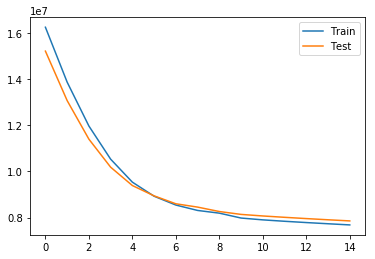

In [51]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()